# **4. Evaluation Metrics for Classification**

In the previous session, we trained a model for predicting churn. How do we know if it's good?


## **4.1 Evaluation metrics: session overview**(video 1)

The fourth week of Machine Learning Zoomcamp is about different metrics to evaluate a binary classifier. These measures include accuracy, confusion table, precision, recall, ROC curves(TPR, FRP, random model, and ideal model), AUROC, and cross-validation.

For this project, we used a Kaggle dataset about churn prediction.

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

**Metric** - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings("ignore")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

* We will talk about evaluation metrics for classification.
* In previous session we talk about churn prediction.
* We build a model that use Logistic Regression for scoring customers existing the customer and assigning the probability of this customer leaving the company.
* We trained the model and then our accuracy for this model was 80 percent.
* On this session we try to find out what does it actually mean like , is it a good accuracy is it a good score or not, and other way of evaluating binary classification models.
* Keep using the term prediction model and the model we trained previously.
* Train the test split dictionary vectorizer Logistic Regression all the processing.
* We train a model is 80 percent accurate.
* This number accuracy and compare it with a baseling model.
* The we will look at different type of errors so with accuracy and looks all predictions correct and incorrect.
* Look at different types of errors and different types of correct decisiions.
* How to put the number in a table that is called the confusion table there we will call about precision and recall which are good evaluation metrics that are very useful for binary classification problems.
* We'll talk about ROC curves, and ROC receiver operator characteristics this gives us a way to evaluate a model.
* Accuracy in evaluating hard predictions.
* Cross validation which is a way of validating our model. 




# **4.2 Accuracy and dummy model**(video 2)

**Accuracy** measures the fraction of correct predictions. Specifically, it is the number of correct predictions divided by the total number of predictions.

We can change the decision threshold, it should not be always 0.5. But, in this particular problem, the best decision cutoff, associated with the highest accuracy (80%), was indeed 0.5.

Note that if we build a dummy model in which the decision cutoff is 1, so the algorithm predicts that no clients will churn, the accuracy would be 73%. Thus, we can see that the improvement of the original model with respect to the dummy model is not as high as we would expect.

Therefore, in this problem accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

Classes and methods:

* np.linspace(x,y,z) - returns a NumPy array starting at x until y with a z step
* Counter(x) - collection class that counts the number of instances that satisfy the x condition
* accuracy_score(x, y) - sklearn.metrics class for calculating the accuracy of a model, given a predicted x dataset and a target y dataset.



In [ ]:
len(y_val)

1409

* It tell us the fraction of correct predictions 1,409 customers make a prediciton, we assign a scores, 0.2,0.3,0.2,0.4,0.55,0.17, we classify people churn and no churn

In [ ]:
(y_val == churn_decision).mean()

0.8034066713981547

* We can find sum decision which us tell us how many are incorrect and correct and some of decision are not correct


In [ ]:
1132/ 1409

0.8034066713981547

* Number of predictions divide the number of customer which approximately 80 percent 

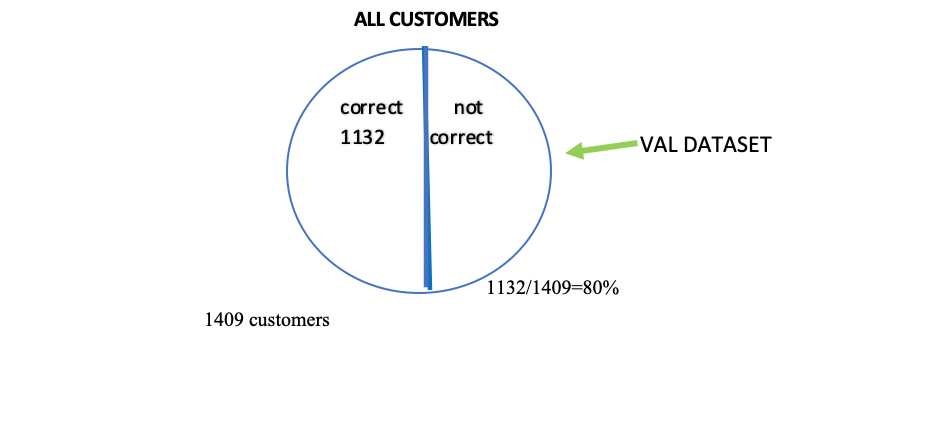

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [ ]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


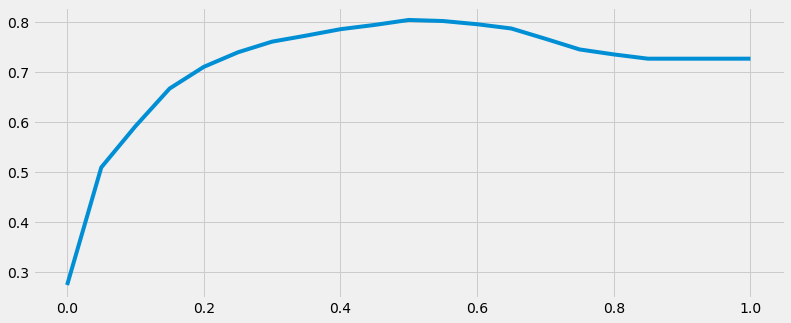

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
from collections import Counter

In [ ]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [ ]:
1 - y_val.mean()

0.7260468417317246

* Evaluate the model on different thresholds

* Check the accuracy of dummy baselines

## **4.3 Confusion table** (video 3)

**Confusion table** is a way to measure different types of errors and correct decisions that binary classifiers can made. Considering this information, it is possible evaluate the quality of the model by different strategies.

If we predict the probability of churning from a customer, we have the following scenarios:

* No churn - Negative class
  * Customer did not churn - True Negative (TN)
  * Customer churned - False Negative (FN)
*Churn - Positive class
  * Customer churned - True Positive (TP)
  * Customer did not churn - False Positive (FP)

The confusion table help us to summarize the measures explained above in a tabular format, as is shown below:


Actual/Predictions	Negative	Positive

Negative	             TN	      FP

Positive	             FN	      TP

The accuracy corresponds to the sum of TN and TP divided by the total of observations.



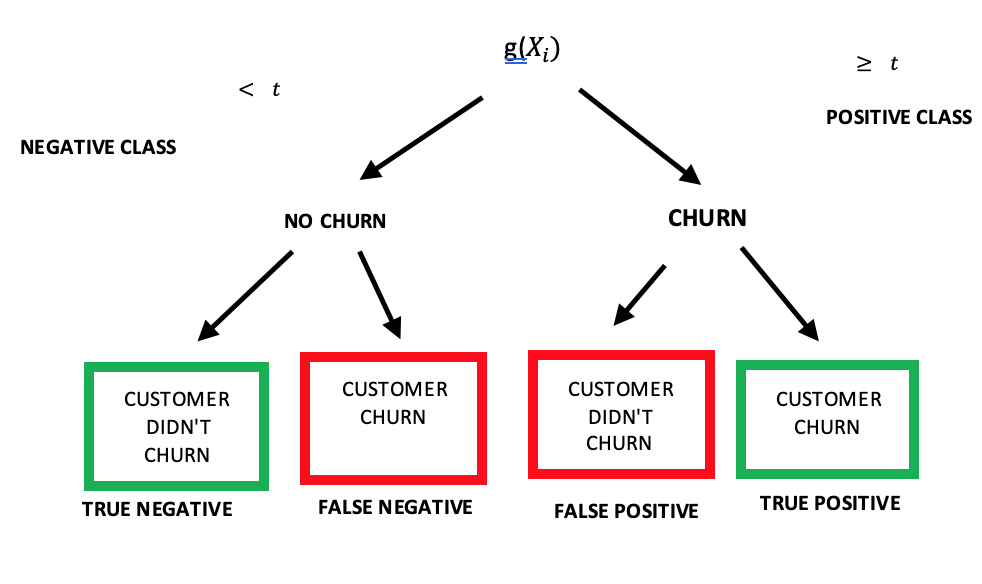

* We have a customer **Xi** and then we apply our function **g** to this customer and we get a decision, what we can decide is we can predict churn and we do this if our prediction is above a threshold or we predict no churn if our prediction is below the threshold this is the decision we make, and remember that in case we decide that the person is going to churn, we want to send them a promotional email and professional
* We think the person is not going to churn we're not going to send them anything two scenarios can happen after that or four, our model output some score, and the score is less than 0.5 for some other  threshold our prediction is mature what can happen is that customer indeed didn't churn or what can happen is we predict **no churn** but the customer did, churn in this case we would be making an error when we predict **no churn** and the same can happen with churn we can again have two possible scenarios here we predict churn and we make a correct decision customer churned or, we make an error and we think that customer is going to churn but they do not churn in case we predict that customer is churning, we think that this instance this customer is a **positive class**, we predict that it's positive so there is churn and no-churn we predict that this is on an instance of a  **negative class**, these two class, customer they were going to churn and no-churn, this is correct and then when we predict no churn and the customer being in churn this is correct and then two other scenarios there are incorrect decisions so we predicted customer churn but it didn't, the **green color is correct decision** and the **red one is incorrect decision**, and each of these four outcomes they have their name so when we predict positive and customer end up churning this is called **TRUE POSITIVE** we think this observation belongs to positive class and it churned out correct, that's why we have **TRUE POSITIVE**, it is positive we think it's positive and this is correct

* Then the other correct prediction is **TRUE NEGATIVE**, we think that customer observation belongs to the **negative class** and is correct its called **TRUE NEGATIVE** the other two instances there are other cases we make incorrect decisions they're both they start with **false**, in the first case when we predict that instance observation belongs to the **positive class**, but it's not correct we think the customer is churning but they do not churn, this is **FALSE POSITIVE** we think this is positive, but these false and we think that this customer is churning we sent them an email but they are not showing and then they just use this discount  even though they weren't going to churn and then another the last one is also  **FALSE NEGATIVE**, here we think that this person is okay they are not going to leave us but they decide to leave us anyways, we again make an incorrect decision and we falsely predicted that this customer is non-churning one these are the **Four Different Outcomes**

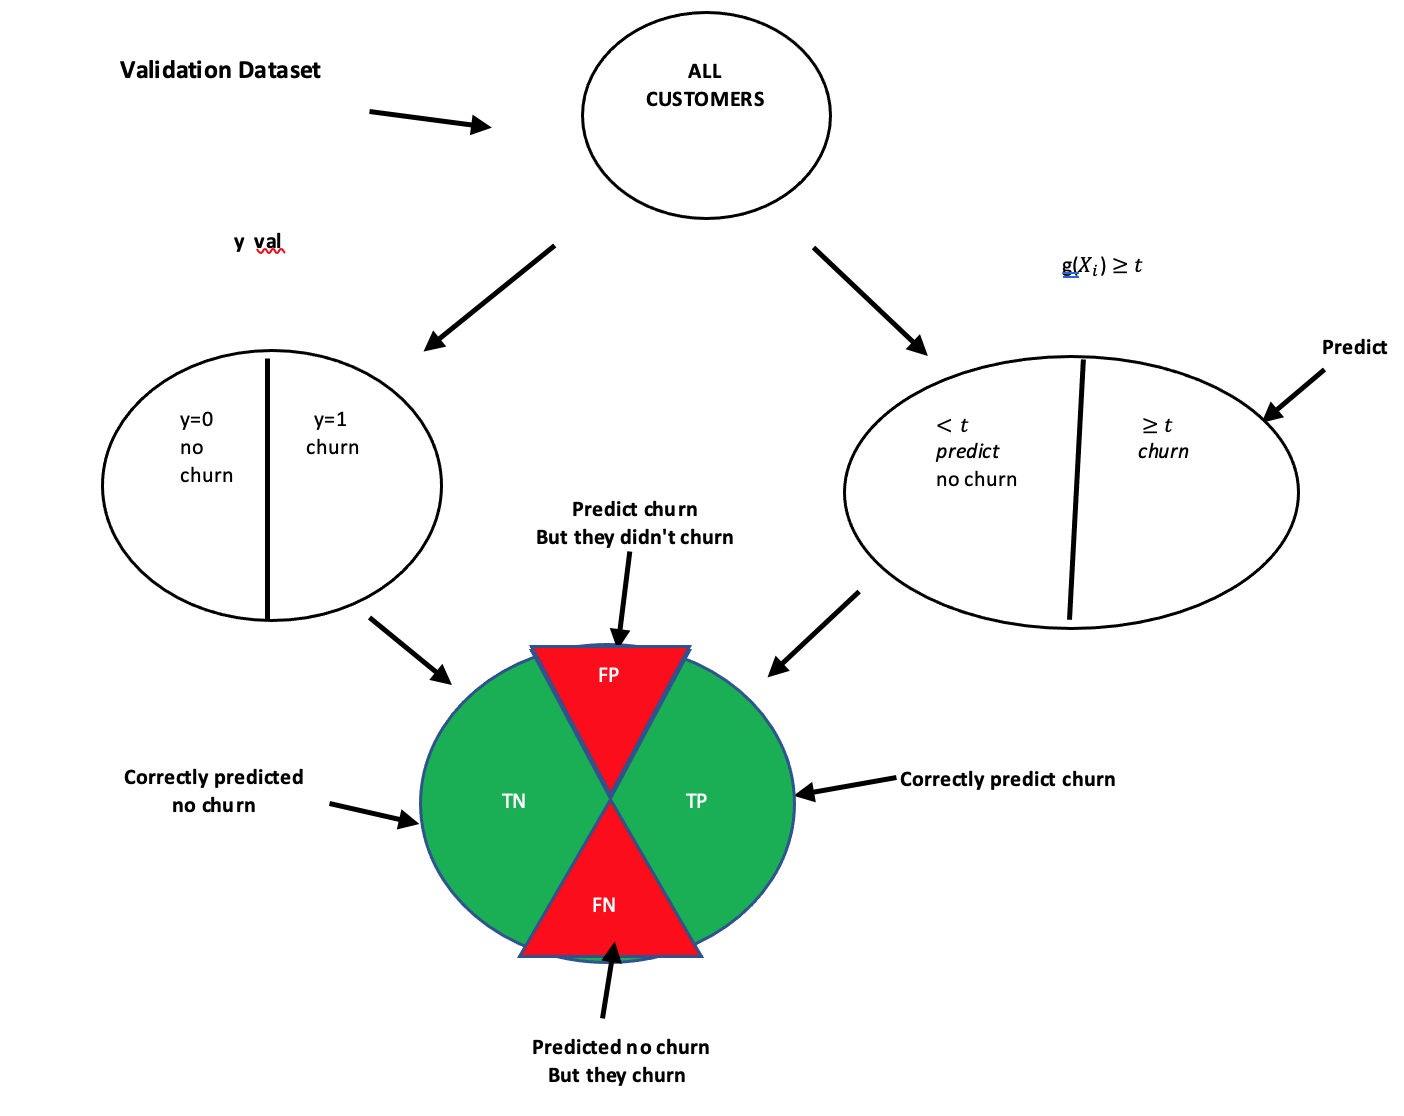

* To all customers from the validation dataset and we can split this validation dataset into different ways.
* First when we split we can use our target variable, we can use our **y validation** and we can split all the customer so this is our **ALL CUSTOMER** and first, we can use our y validation to speed these customers we split them into ***two parts*** the first part is people who churn so this churn, the **churn is y equal to one** and the second the group of customer those who didn't **churn y equal to zero** no churn, this is one way of splitting all our customers into two groups, the other way would be using our function  like our model depending on the threshold, we can conclude either we predict that this customer is going to churn, the first one is we predicted churn and predict non-churn when the score is above the threshold and then this is above, when it's below the threshold, we can take all customers then can split all the customers into two groups those who we think are going to churn those who we think are not going to churn and then we combine those two splits into one, now when we combine, we have our target variable, we have our actual values, we know people who have churned who didn't, and we have also our customers who we predicted as churning this group is people who we predicted this churning correctly predicted as churning the one is correctly predicted and then last two groups correctly predicted no churn, **PREDICTED NO CHURN BUT THEY CHURNED**, **PREDICT CHURN BUT THEY DIDN'T CHURN**, two out of these four groups are correct and two are not correct  **TRUE POSITIVE** and the one is **TRUE NEGATIVE**, these are the correct prediction, these **false positive and false negative** we will now implement this in python code

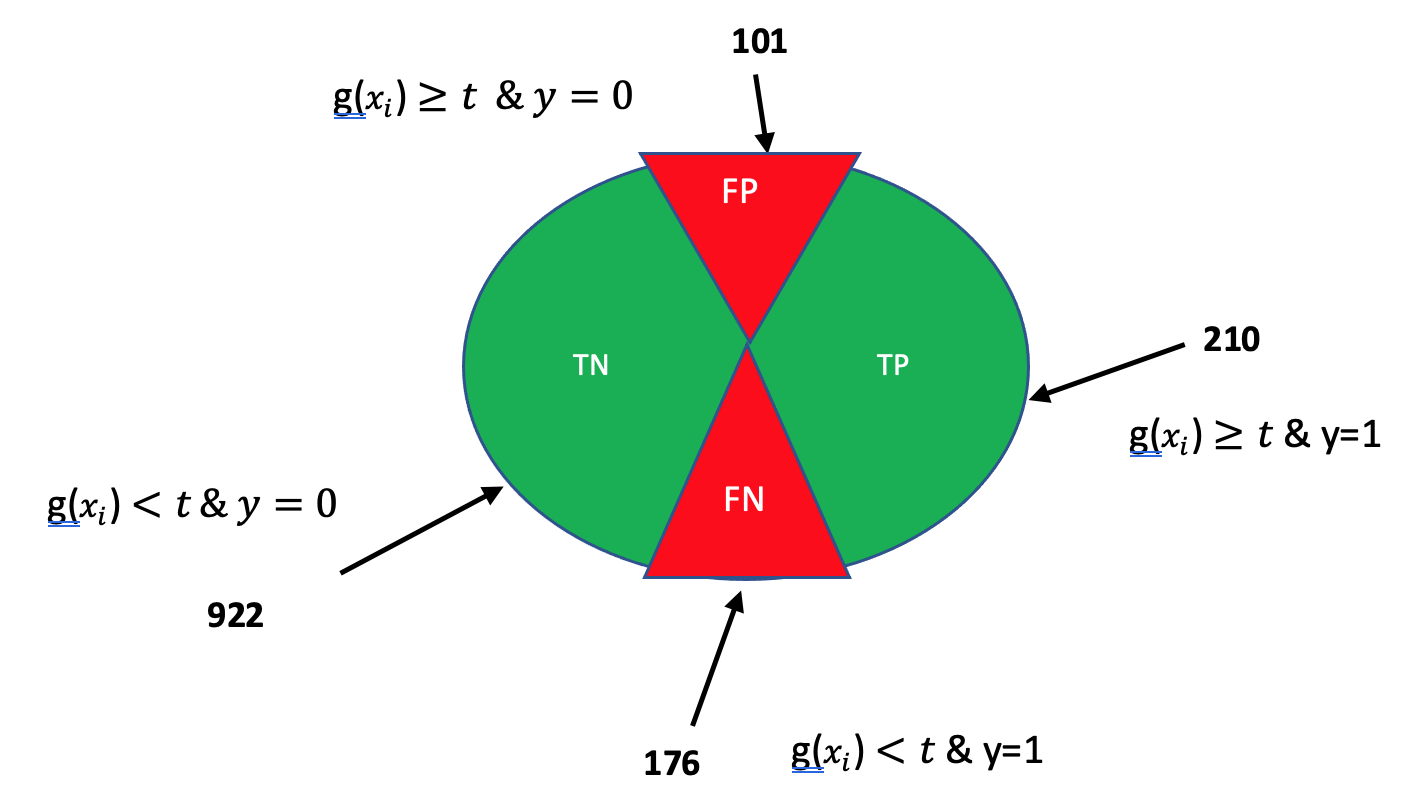

* And here true positive are when we predict that our customer is churning and they are **g(Xi) ≥ t** indeterminate both our prediction is above threshold and  label the correct label is true then for this one **(y=1)** for true negative we predict **g(Xi) ≤ t** our prediction is that customer is not churning and correct label is zero **y=0**, label is negative for false negative **(g(Xi)< t & y=1**, we predict that  customer is not going to churn but they actually are churning they are going to churn prediction is negative but actual label is positive and the finally the last one is our prediction is positive **g(Xi ≥ t & y=0** false positive we predict that the customer is going to churn but if the actual label s negative they are not going to churn.
* Actual positive people who do churn and their case when i validation equal to one.
* Actual negative people who are not going to churn.





In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
actual_positive

array([False, False, False, ..., False,  True,  True])

In [ ]:
actual_negative

array([ True,  True,  True, ...,  True, False, False])

* The actual positive is an array with true false it's a binary array it says true when a customer is going to churn an actual is true.
* Our binary array contains only true and false values so true for this one to predict true positive.

In [ ]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)


* Threshold is 0.5 we predict both predict positive and predict negative.
* Our binary array contains only true and false values so true for this one to predict true positive.

In [ ]:
predict_positive & actual_positive

array([False, False, False, ..., False,  True,  True])

* combine it to predicted positive and actual positive we can use this binary operation from NumPy it turns an array that is true only if both are true, and we can quickly check this predict positive.


In [ ]:
predict_positive[:5]

array([False, False, False,  True, False])

In [ ]:
actual_positive[:5]

array([False, False, False,  True, False])

* Try to look at the first five both of them are true, the result will be true, and the output could be false, both have to be true False, false output true, True, false output false, true, true output true.
* When both predicted positive and actual positive is true, this is the end of the operator the element-wise logical

In [ ]:
(predict_positive & actual_positive).sum()

210

* We can see that there sum is 210

In [ ]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp,tn

(210, 922)

In [ ]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp,fn

(101, 176)

In [ ]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

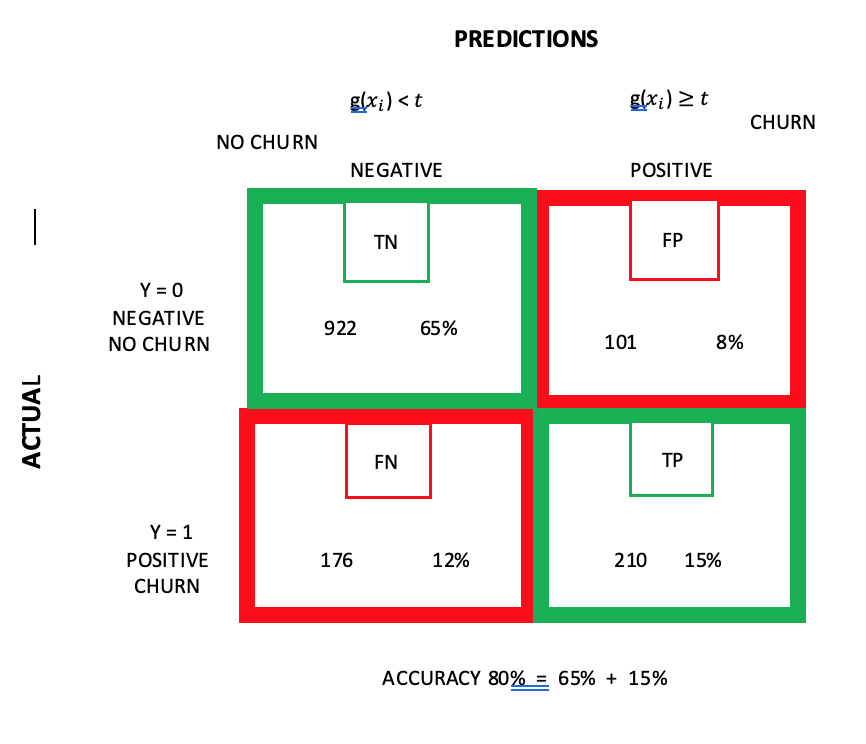

* The Actual value is the rows we have positive y is equal to one, and negative is equal to zero and we talk about our project.
* Churn and no churn, in actual positive is churning and negative is no-churn, now we put some values here, and we put true positive TP, we predict churn and user, true negative TN we predict no churn and user didn't churn.
* Then when predicting that a customer is going to churn but they do not this is false positive FP and the final one is false negative FN, we predict no churn but the person is going to churn.
* The correct thing is in green color **true positive** and **True negative** and the red color line **false positive and false negative** are not correct and we have **TN=922, TP =210, FP=101, FN=176**, now we can create the same matrix.
* We can also normalize this, by normalizing we have absolute numbers, and we little bit round it into two decimal places **TN 922=65%, TP 210 =15%** these are all correct predictions, **FP 101=8%, FN 176=12%**there are incorrect in line red color and the green one is correct.

* We remember our accuracy is 80% we have two types of correct the the decision first is **TRUE NEGATIVE** which is **65%** and we have **15%**  of **TRUE POSITIVE** this is how we can see our accuracy we need to sum these two to get our accuracy this is the confusion table.
* What kind of correct and incorrect decisions does our model.
* Arrange different types of mistakes and correct predictions and consists of true negative, false positive, false negative, and true positive, used to define other evaluation metrices.

In [ ]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

* In code we have the same result from the diagram, true negative 922 and then true positive is 210, false negative 176 then for false positive 101, false positive people who get the email even though they are not going to churn so we lose 25% some money by giving them the discount they are not going to churn but we give them discount and they use this discount because why not, we are losing money here and for false negative 176 we don't send them an email and they leave, we are losing profit here because we do not manage to retain these customers and they leave and they stop paying us all together this is the situation, we want to await
* Different types of errors and correct decisions

In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

* We can also normalize this, by normalizing we have absolute numbers, and we little bit round it into two decimal places TN 922=65%, TP 210 =15% these are all correct predictions, FP 101=8%, FN 176=12% there are incorrect in line red color and the green one is correct

* Arranging them on a table

# **4.4 Precision and Recall** (video 4)

**Precision** tell us the fraction of positive predictions that are correct. It takes into account only the positive class (TP and FP - second column of the confusion matrix), as is stated in the following formula:

image.png

**Recall** measures the fraction of correctly identified postive instances. It considers parts of the postive and negative classes (TP and FN - second row of confusion table). The formula of this metric is presented below:

image.png

In this problem, the precision and recall values were 67% and 54% respectively. So, these measures reflect some errors of our model that accuracy did not notice due to the class imbalance.




## Precision

In [ ]:
(tp + tn)/(tp + tn + fp + fn)

0.8034066713981547

In [ ]:
p = tp / (tp + fp)
p

0.6752411575562701

In [ ]:
tp + fp

311

In [ ]:
tp

210

* Express accuracy as the sum of true positive plus true negative and we divide that by the total number of all the observations in our case its true positive to negative, false positive, false negative and we get an accuracy of 80%
* The precision is 67%
* email 311

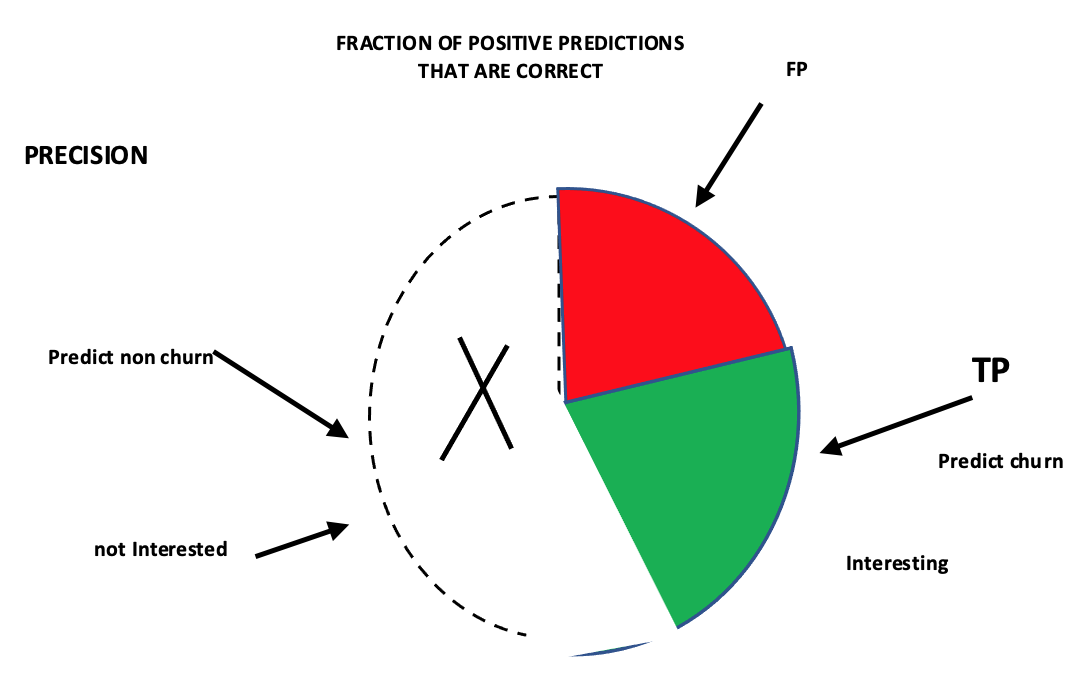

* Precision tell us how many positive predictions churned out to be correct or more like not how many but fraction of positive predictions that are correct it means the we predict some customers
* Customers as churning and then out of those how many are idendified correctly
* We interested in predicted churn we remove the predicted non churn.
* The formula for computing precision is we have true positive which is the number people that we correctly identified as churning and we have false positive PRECISION = TP/#Positive = TP/TP+FP, PRECISION =3/4 = 75%

## Recall

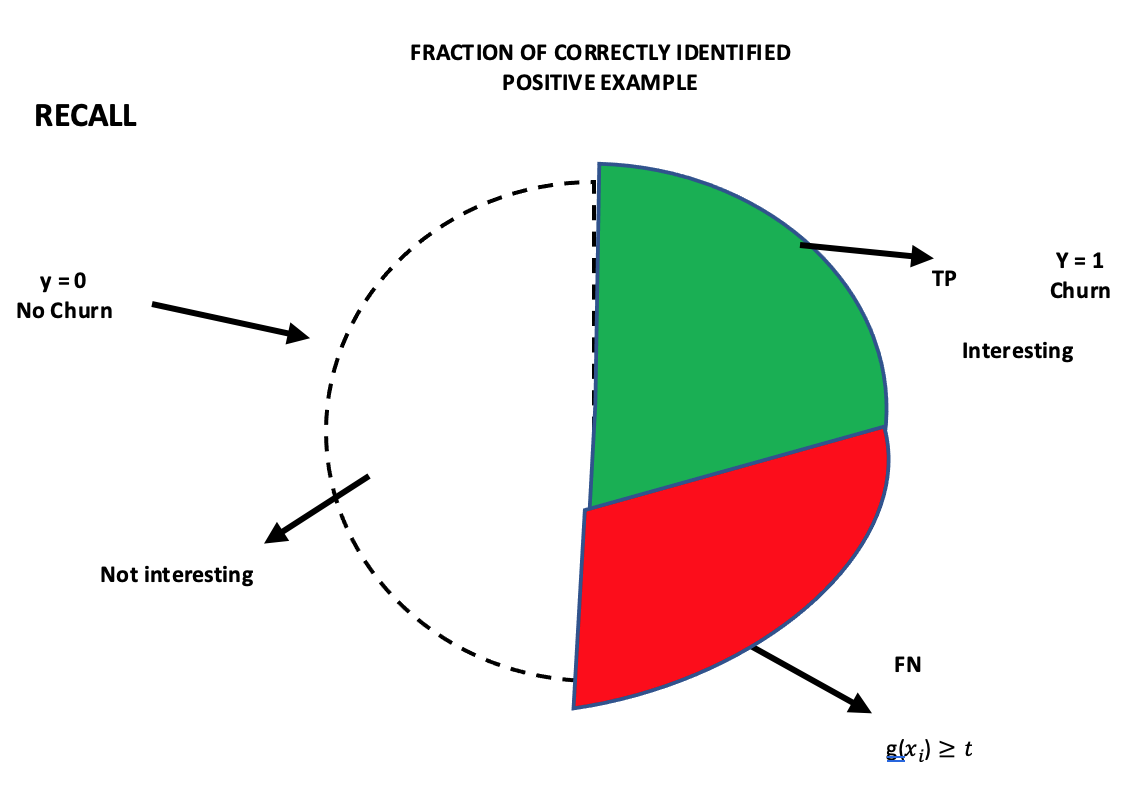

* Recall tell us what is the fraction of those customers, how many of them were able to correctly identify
* Recall tell us what i the fraction of correctly identified churning users is.
* Formula R = TP/Number of positive obs. = TP/ TP + FN

In [ ]:
r = tp / (tp + fn)
r

0.5440414507772021

In [ ]:
tp + fn

386

* We quickly implemented it, let's see recall is equal to true positive in this case instead of dividing it by a false positive, divide it by a false negative and it gives us 54% which means that for 46 of people who are churning we failed to identify them.

## **4.5 ROC Curves** (video 5)

**ROC** stands for Receiver Operating Characteristic, and this idea was applied during the Second World War for evaluating the strength of radio detectors. This measure considers **False Positive Rate** (FPR) and **True Positive Rate (TPR)**, which are derived from the values of the confusion matrix.

**FPR** is the fraction of false positives (FP) divided by the total number of negatives (FP and TN - the first row of the confusion matrix), and we want to minimize it. The formula of FPR is the following:

image.png

In the other hand, TPR or Recall is the fraction of true positives (TP) divided by the total number of positives (FN and TP - second row of confusion table), and we want to maximize this metric. The formula of this measure is presented below:

image.png

**ROC** curves consider Recall and FPR under all the possible thresholds. If the threshold is 0 or 1, the TPR and Recall scores are the opposite of the threshold (1 and 0 respectively), but they have different meanings, as we explained before.

We need to compare the ROC curves against a point of reference to evaluate its performance, so the corresponding curves of random and ideal models are required. It is possible to plot the ROC curves with FPR and Recall scores vs thresholds, or FPR vs Recall.

**Classes and methods:**

* np.repeat([x,y], [z,w]) - returns a numpy array with a z number of x values, and a w number of y values.
* roc_curve(x, y) - sklearn.metrics class for calculating the false positive rates, true positive rates, and thresholds, given a target x dataset and a predicted y dataset.



In [ ]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [ ]:
r

0.5440414507772021

In [ ]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

* Compute them so first we have true a positive rate which is the number of true positives divided by true positive plus false negative and then the false positive rate is the number of false positive divided by the number of false positives plus true negative this is the same as recall

In [ ]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

* Evaluating these two values just for one threshold for this case, we evaluated them for this threshold of 0.5 and we got these two values ROC curve looks at all the possible thresholds for each threshold that we can think of it evaluates these qualities
* Compute the possible thresholds, use  the linspace function to evaluate these values, to get the confusion table
* * Create a variable call score, append the tuple that will contain the threshold for which we evaluate our model and it will contain all these t, tp,fp, fn,tn now scores

In [ ]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

* Now scores, looks like a bunch of tuples, and then we have a lot of thresholds with increments of 0.01 and then for each of the thresholds we evaluate all the values for the confusion matrix we end up with 101 different confusion matrices evaluated for different thresholds

In [ ]:
pd.DataFrame(scores)

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


* This records from the first records to the last records

In [ ]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)


In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


In [ ]:
# same as above code
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

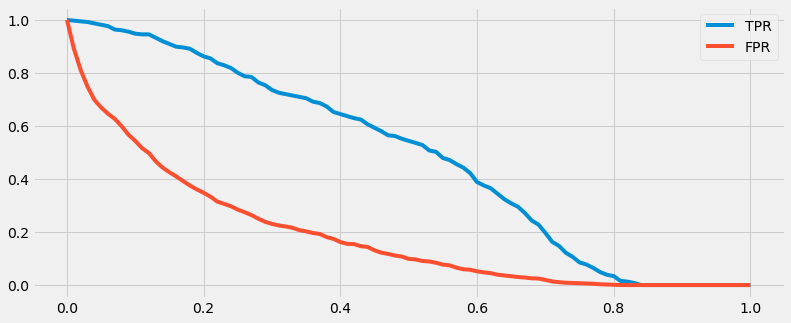

In [ ]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

* The blue one is the true positive rate the orange is the false positive rate on the Y axis we have a threshold for the threshold of zero we can see that both the true positive rate and false positive rate are one means that this is a dummy model that predicts everyone as churning for the true positive rate is 100 percent because for all the positive customers for all the churning customers all of them are identified correctly and again false positive rate is 100 percent for non-churning ones, we make 100 we predict all of them incorrectly, as churning the blue curve goes down with different rate the orange one goes down faster and we want to go down as fat as possible.
* To minimize its values as low as possible and for true positive weight.

## Random model

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))


* Compute the random model to implement to assign the customer a random score between 0 and 1

In [ ]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [ ]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [ ]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [ ]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


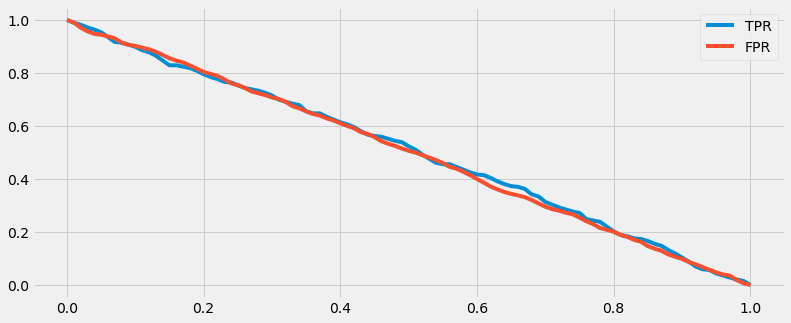

In [ ]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

* For the threshold of 0 to 0 threshold of one  for 0.6 it 0.4 for both true positive rate and false positive rate and the reason for that is basically because we're here almost like throwing the coin but this coin like because we are here looking at the threshold of 0.6 This is our threshold in 60% of cases this model predicts that this customer is non-churning and in 40% of cases it predicts that this customer is churning and we see that's why like it's 0.4 which is 40 percent just with a probability of 40% for a customer that is churning it predicts that it's churning  that's why we have 40 percent and with a probability of 60% it predicts that this customer is not churning which means that in 40% of the cases this model is incorrect for non-churning ones. it's almost a straight line turn one to zero.

## Ideal model

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

* We will create y ideal and in this case first it will contain only negative observations and then it will contain only positive observation  for that we'll use the np.repeat function, create an array that first contain zero and the candidates once and, then it should contain 1023 zero and then it should contain 386

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))


In [ ]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

* Kind of validation set, to create a predictions
* y ideal prediction for our classifier and this y ideal is kind of the actual values so our customers who are joining or not joining

In [ ]:
1 - y_val.mean()

0.7260468417317246

In [ ]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


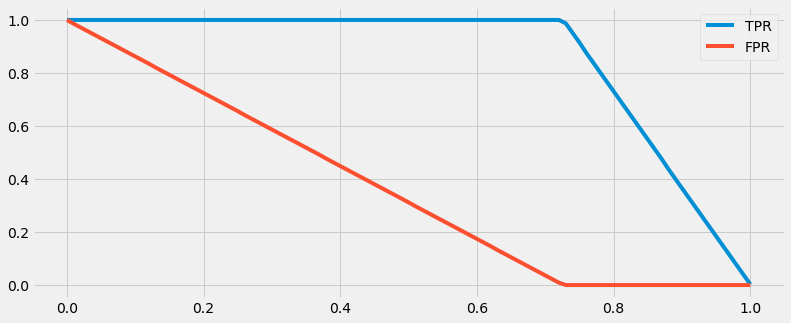

In [ ]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

* True positive rate all always almost around one this ideal scenario and then it's starting to go down at this threshold so this threshold is 0.72726  the model can identify for true positive rate model can identify the churning customers correctly for people who are not churning when it's they are churning it's not always true it becomes true when it crosses this threshold simply because let's say 0.4 here so this is false positive rate 45% so it means here that still make mistake simply because we cut at 0.4 for approximately 20 percent of people who are predicted as non-churning but they're simply below to the threshold of 0.726 we predict them as churning Even though they are not that's why the model is we're making a mistake when using threshold and the false positive rate is 45% but it's going down at the threshold it classifies everything correctly, this how ideal look like.


### Putting everything together


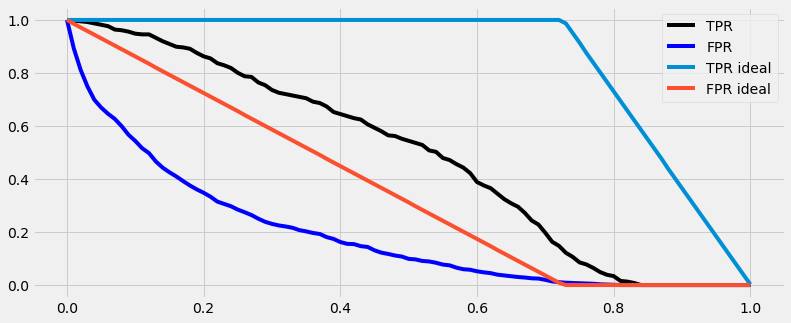

In [ ]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

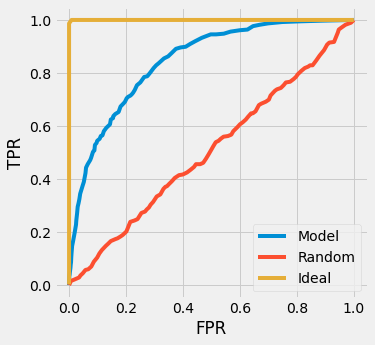

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr,df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

* We saw this behavior on the previous plot it just goes true positve rate and false positive rate they move together that's why its kind of a straight line between zero and one there are same fluctuations here simply because this model random sometimes it  by chance gets a bit more accurate sometimes it gets a bit less accurate that's why there are some limitations and then that's also interested what is also intersting the way the ideal model behaves it.
* In y axis we have a false positive rate and the y axis we have true positive rate this bit easier to see the plot with label
* The ideal model to reach this point when both true positive rate and false positive rate are both 100% and this is the fourth threshold of 0.726 they have a point when both of these values are 100% this is like the ideal spot we can call the North star this is where we want to get.

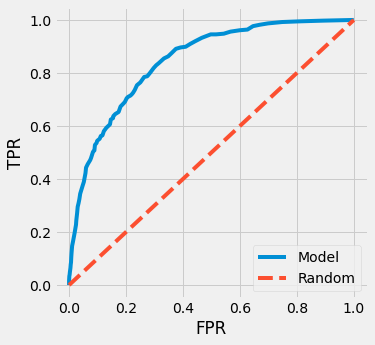

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

* To aim at this point over here we can just keep it in mind we don't need to plot it every time this is how the ROC curve looks like
* For this roc curve we plot true positive against a false positive rate and we usually add the random baseline we want our curve to be close as possible to this ideal spot and to be as far as possible from this random baseline if our model is somewhere close this baseline then its not good model we want to be close as possible to this ideal spot where we make no mistake and that's why the ROC for our model looks like.


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)


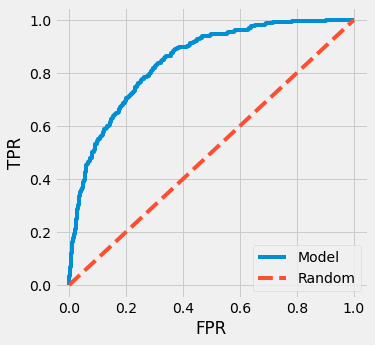

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

* ROC curve is a way of understanding how the model performs across all the thresholds from zero to one and we managed to plot this chart that shows how well our model is separating churning users from non-churning users and for the roc curve we're interested in is we want to be as close to the ideal point as possible.

# **4.6 ROC AUC** (video 6)

The Area under the ROC curves can tell us how good is our model with a single value. The AUROC of a random model is 0.5, while for an ideal one is 1.

In other words, AUC can be interpreted as the probability that a randomly selected positive example has a greater score than a randomly selected negative example.

**Classes and methods:**

* auc(x, y) - sklearn.metrics class for calculating area under the curve of the x and y datasets. For ROC curves x would be false positive rate, and y true positive rate.
* roc_auc_score(x, y) - sklearn.metrics class for calculating area under the ROC curves of the x false positive rate and y true positive rate datasets.


* Area under the ROC curve - useful metric
* Interpretation of AUC

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr, tpr)

0.8438530381535563

* This computes the area under the curve and the curve is defined using arrays with X and y points appearing and y is TPR for our model.


In [ ]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

* It's more accurate because we only evaluated the model in 101 threshold disputes in more thresholds these a smart way of evaluating all against all the thresholds, more accurate

In [ ]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)


0.8438530381535563

* how we compute the AUC you see has a very good and useful interpretation.

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [ ]:
pos

array([0.54304519, 0.58226482, 0.46169704, 0.73943277, 0.06580809,
       0.69174867, 0.24736694, 0.69654234, 0.21208683, 0.66510161,
       0.47346945, 0.34864209, 0.15046708, 0.61756353, 0.764722  ,
       0.14247808, 0.43290496, 0.27301574, 0.068847  , 0.19234954,
       0.67062685, 0.41598872, 0.66202742, 0.5831679 , 0.52439483,
       0.43307555, 0.4685642 , 0.35115275, 0.56776087, 0.3217743 ,
       0.63522231, 0.74370026, 0.73843638, 0.60894087, 0.70873294,
       0.76478441, 0.10728877, 0.18071018, 0.5420323 , 0.57943066,
       0.43655974, 0.44059724, 0.75707445, 0.38576055, 0.69438603,
       0.41767481, 0.75786841, 0.30226011, 0.53390216, 0.58068015,
       0.1540788 , 0.52946888, 0.78578613, 0.43643101, 0.67325963,
       0.77440778, 0.01263566, 0.35107655, 0.79769955, 0.58467726,
       0.67391962, 0.24821629, 0.34497454, 0.7016388 , 0.2096153 ,
       0.68593599, 0.63630453, 0.29105896, 0.6605026 , 0.30802916,
       0.50166621, 0.27182703, 0.3971038 , 0.41039686, 0.49932

In [ ]:
import random

In [ ]:
pos_ind = random.randint(0,len(pos) - 1)
pos_ind

310

In [ ]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84304

In [ ]:
n = 10000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [ ]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84646

# **4.7 Cross-Validation** (video 7)

**Cross-validations** spreading to evaluating the same model on different subsets of a dataset, getting the average prediction, and spread within predictions. This method is applied in the parameter tuning step, which is the process of selecting the best parameter.

In this algorithm, the full training dataset is divided into k partitions, we train the model in k-1 partitions of this dataset and evaluate it on the remaining subset. Then, we end up evaluating the model in all the k folds, and we calculate the average evaluation metric for all the folds.

In general, if the dataset is large, we should use the hold-out validation dataset strategy. In the other hand, if the dataset is small or we want to know the standard deviation of the model across different folds, we can use the cross-validation approach.

**Libraries, classes and methods:**

* Kfold(k, s, x) - sklearn.model_selection class for calculating the cross-validation with k folds, s boolean attribute for shuffle decision, and an x random state
* Kfold.split(x) - sklearn.Kfold method for splitting the x dataset with the attributes established in Kfold's object construction.
* for i in tqdm() - library for showing the progress of each i iteration in a loop.

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

* We talk about the parameter tuning is the process of selecting the best parameter.
* Split data into three parts Train,Val, Test
* We use validation data set to find the best parameter for hormonalogy so we find the best parameters for training the model but its not only possible way of validating our model.
* For test dataset we always set up the site but for validation set we have different options.

* We leave aside the test part we hold it out and forget about this and we have a full train dataset and we split it into multiple parts.
* We can split it into k parts in our cases we can say that k is equal to three, let's say we split it into three parts one two, and three.

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
dv, model = train(df_train, y_train, C=0.001)

In [ ]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm.auto import tqdm
from  sklearn.model_selection import KFold

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.007
C=0.5 0.840 +- 0.006
C=1 0.840 +- 0.008
C=5 0.841 +- 0.008
C=10 0.842 +- 0.008


In [ ]:
scores

[0.8437252239169172,
 0.8458461627598993,
 0.8325265904073851,
 0.8329702788258618,
 0.8525462018763139]

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

# **4.8 Summary** (video 8)

* Metric - a single number that describes the performance of a model
* Accuracy - a fraction of correct answers; sometimes misleading
* Precision and recall are less misleading when we have a class imbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

# **4.9 Explore more**

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* F1 score = 2 P R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

* Calculate the metrics for datasets from the previous week